In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

In [2]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data=pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data=pd.merge(clinical_trial_data,mouse_drug_data,on="Mouse ID",sort=False)
#output=data.to_csv("data.csv")

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
data_grouped=data.groupby(["Drug","Timepoint"])
avg_tumor_vol=data_grouped["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
avg_tumor_vol=pd.DataFrame(avg_tumor_vol).reset_index()
# Preview DataFrame
avg_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol=data_grouped["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
sem_tumor_vol=pd.DataFrame(sem_tumor_vol).reset_index()
# Preview DataFrame
sem_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vol=pd.pivot_table(avg_tumor_vol,values="Tumor Volume (mm3)",index="Timepoint",columns="Drug")
sem_tumor=pd.pivot_table(sem_tumor_vol,values="Tumor Volume (mm3)",index="Timepoint",columns="Drug")
# Preview that Reformatting worked
tumor_vol.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


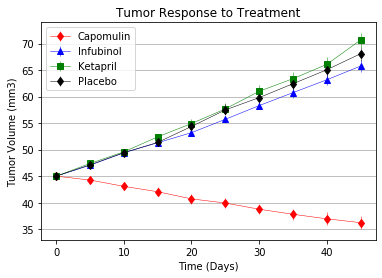

In [6]:
# Generate the Plot (with Error Bars)
fig, ax=plt.subplots()
drug_select=["Capomulin","Infubinol", "Ketapril", "Placebo"]
ax.errorbar(tumor_vol.reset_index()["Timepoint"],
            tumor_vol[drug_select[0]],
            yerr=sem_tumor[drug_select[0]],
            marker="d",color="r",linewidth=0.5,label=drug_select[0])
ax.errorbar(tumor_vol.reset_index()["Timepoint"],
            tumor_vol[drug_select[1]],
            yerr=sem_tumor[drug_select[1]],
            marker="^",color="b",linewidth=0.5,label=drug_select[1])
ax.errorbar(tumor_vol.reset_index()["Timepoint"],
            tumor_vol[drug_select[2]],
            yerr=sem_tumor[drug_select[3]],
            marker="s",color="g",linewidth=0.5,label=drug_select[2])
ax.errorbar(tumor_vol.reset_index()["Timepoint"],
            tumor_vol[drug_select[3]],
            yerr=sem_tumor[drug_select[3]],
            marker="d",color='0',linewidth=0.5,label=drug_select[3])
ax.set_ylim(33,74)
ax.grid(axis="y")
ax.legend(loc="best")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor Response to Treatment")

# Save the Figure
plt.savefig("treatment.png")

#Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
avg_met_site=data_grouped["Metastatic Sites"].mean()
# Convert to DataFrame
avg_met_site=pd.DataFrame(avg_met_site)
# Preview DataFrame
avg_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_site=data_grouped["Metastatic Sites"].sem()
# Convert to DataFrame
sem_met_site=pd.DataFrame(sem_met_site)
# Preview DataFrame
sem_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
met_site=pd.pivot_table(avg_met_site,values="Metastatic Sites",index="Timepoint",columns="Drug")
sem_met=pd.pivot_table(sem_met_site,values="Metastatic Sites",index="Timepoint",columns="Drug")
# Preview that Reformatting worked
met_site.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


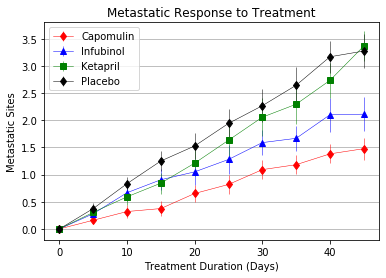

In [10]:
# Generate the Plot (with Error Bars)
fig,ax=plt.subplots()
ax.errorbar(met_site.reset_index()["Timepoint"],
            met_site[drug_select[0]],
            yerr=sem_met[drug_select[0]],
            marker="d",color="r",linewidth=0.5,label=drug_select[0])
ax.errorbar(met_site.reset_index()["Timepoint"],
            met_site[drug_select[1]],
            yerr=sem_met[drug_select[1]],
            marker="^",color="b",linewidth=0.5,label=drug_select[1])
ax.errorbar(met_site.reset_index()["Timepoint"],
            met_site[drug_select[2]],
            yerr=sem_met[drug_select[2]],
            marker="s",color="g",linewidth=0.5,label=drug_select[2])
ax.errorbar(met_site.reset_index()["Timepoint"],
            met_site[drug_select[3]],
            yerr=sem_met[drug_select[3]],
            marker="d",color='0',linewidth=0.5,label=drug_select[3])
ax.set_ylim(-0.2,3.8)
ax.grid(axis="y")
ax.legend(loc="best")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Metastatic Sites")
ax.set_title("Metastatic Response to Treatment")
# Save the Figure
plt.savefig("spread.png")
# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count=data_grouped["Mouse ID"].count()
# Convert to DataFrame
mice_count=pd.DataFrame(mice_count).reset_index()
mice_count=mice_count.rename(columns={"Mouse ID":"Mouse Count"})
# Preview DataFrame
mice_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mice_count=pd.pivot_table(mice_count,values="Mouse Count",index=mice_count["Timepoint"],columns=mice_count["Drug"])
# Preview the Data Frame
mice_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


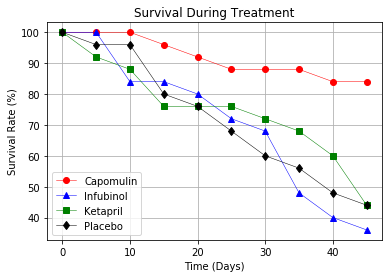

In [13]:
# Generate the Plot (Accounting for percentages)
fig,ax=plt.subplots()
ax.errorbar(mice_count.reset_index()["Timepoint"],
            mice_count[drug_select[0]]/25*100,
            marker="o",color="r",linewidth=0.5,label=drug_select[0])
ax.errorbar(mice_count.reset_index()["Timepoint"],
            mice_count[drug_select[1]]/25*100,
            marker="^",color="b",linewidth=0.5,label=drug_select[1])
ax.errorbar(mice_count.reset_index()["Timepoint"],
            mice_count[drug_select[2]]/25*100,
            marker="s",color="g",linewidth=0.5,label=drug_select[2])
ax.errorbar(mice_count.reset_index()["Timepoint"],
            mice_count[drug_select[3]]/25*100,
            marker="d",color="0",linewidth=0.5,label=drug_select[3])
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.grid()
ax.set_title("Survival During Treatment")
ax.legend(loc="best")
# Save the Figure
plt.savefig("survival.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
tumor_change=(tumor_vol.iloc[9,:]/tumor_vol.iloc[0,:]-1)*100
# Display the data to confirm
tumor_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

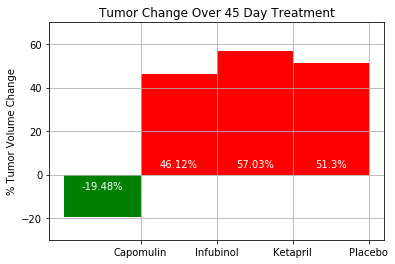

In [15]:
# Store all Relevant Percent Changes into a Tuple
drug_select_change=(tumor_change[drug_select[0]],
                    tumor_change[drug_select[1]],
                    tumor_change[drug_select[2]],
                    tumor_change[drug_select[3]])
# Splice the data between passing and failing drugs
passing_drugs=[]
failing_drugs=[]
for drug in drug_select_change:
    if drug<0:
        passing_drugs.append(drug)
        failing_drugs.append(0)
    else: 
        failing_drugs.append(drug)
        passing_drugs.append(0)
fig,ax=plt.subplots()
# Orient widths. Add labels, tick marks, etc. 
x_axis=range(4)
xtick_loc=[1,2,3,4]
ytick_loc=[-20,0,20,40,60]
bars_fail=ax.bar(x_axis,failing_drugs,width=1,color="r",align="edge")
bars_pass=ax.bar(x_axis,passing_drugs,width=1,color="g",align="edge")
ax.grid()
ax.set_ylim(-30,70)
plt.xticks(xtick_loc,drug_select)
plt.yticks(ytick_loc)
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
# Use functions to label the percentages of changes

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height().round(2)
        if height>0:
            ax.annotate('{}'.format(f"{height}%"),
                    xy=(rect.get_x() + rect.get_width() / 2, 3),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center',color="w")
        elif height<0:
            ax.annotate('{}'.format(f"{height}%"),
                    xy=(rect.get_x() + rect.get_width() / 2, -3),
                    xytext=(0, -8),
                    textcoords="offset points",
                    ha='center',color="w")
        else:pass

# Call functions to implement the function calls
autolabel(bars_pass)
autolabel(bars_fail)

# Save the Figure
plt.savefig("change.png")

# Show the Figure
plt.show()